In [39]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/telecom_churn_clean.csv')

In [3]:
df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [32]:
X = df[df.columns[1:-1]]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, stratify=y, test_size=0.3)

In [33]:
knn = KNeighborsClassifier(n_neighbors=10)

In [34]:
knn.fit(X_train, y_train);

In [35]:
print(knn.score(X_test, y_test))

0.874


In [44]:
train_accuracies, test_accuracies = {}, {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

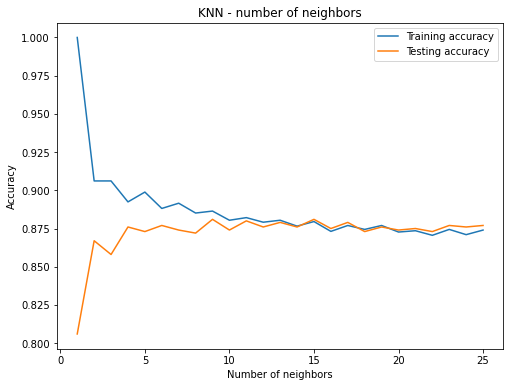

In [45]:
plt.figure(figsize=(8, 6))
plt.title('KNN - number of neighbors')
plt.plot(neighbors, 
         train_accuracies.values(), label='Training accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
train_accuracies

{}